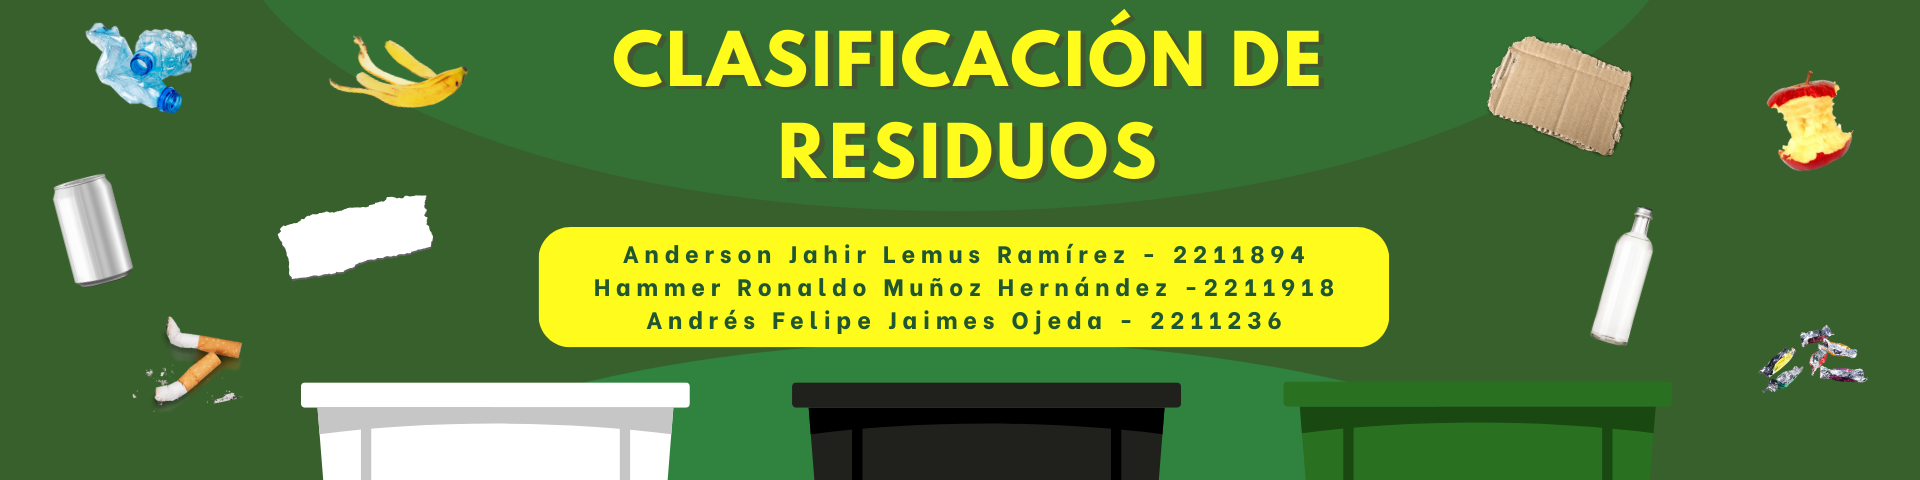

# **Importar librerias**


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from google.colab import drive
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.metrics import accuracy_score,make_scorer,confusion_matrix,classification_report, mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.svm import SVC,SVR
from sklearn.linear_model import LinearRegression

# **Montar drive**

In [ ]:
drive.mount('/content/drive')
dataset_path = '/content/drive/MyDrive/ProyectoIA/DataBase/'

Mounted at /content/drive


# **Cargar imágenes**

In [ ]:
# Inicializa listas para imágenes y etiquetas
images = []
labels = []

# Itera sobre las carpetas/clases
for label, class_dir in enumerate(os.listdir(dataset_path)):
    class_path = os.path.join(dataset_path, class_dir)
    if os.path.isdir(class_path):  # Verifica que sea una carpeta
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            images.append(image_path)
            labels.append(label)

# Crea un DataFrame
data = pd.DataFrame({'Imagen': images, 'Etiqueta': labels})

#Mostrar
data.shape

(3634, 2)

# **Distribución del dataset**

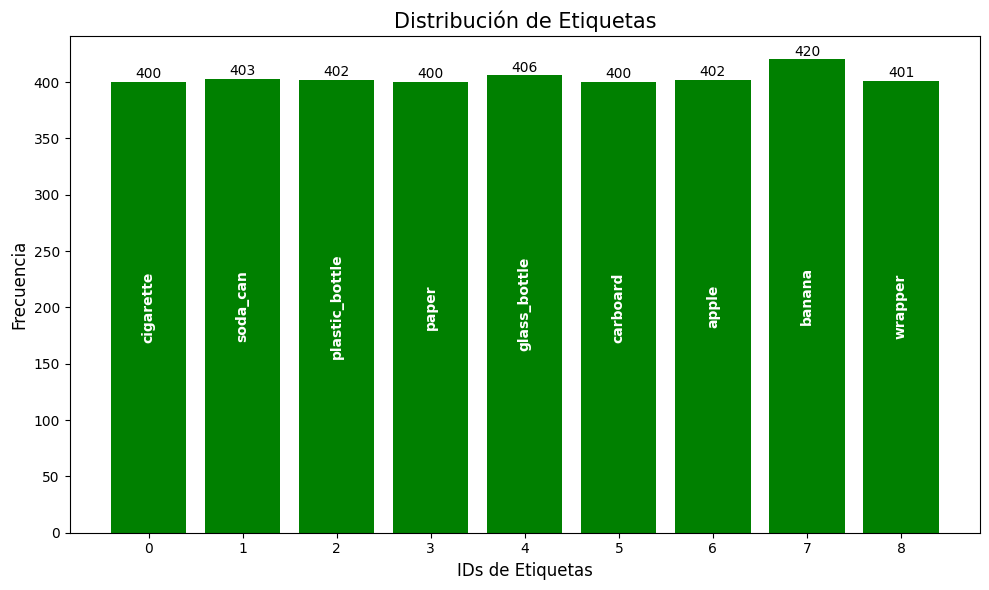

In [ ]:
#Contar la frecuencia de cada etiqueta
label_counts = data['Etiqueta'].value_counts()

# Diccionario
class_labels = {
    0: 'cigarette',
    1: 'soda_can',
    2: 'plastic_bottle',
    3: 'paper',
    4: 'glass_bottle',
    5: 'carboard',
    6: 'apple',
    7: 'banana',
    8: 'wrapper',
}

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(label_counts.index, label_counts.values, color='green')  # Barras verdes

# Agregar etiquetas y título
plt.xlabel('IDs de Etiquetas', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de Etiquetas', fontsize=15)

# Mostrar los nombres de las clases dentro de las barras, rotados 90° y en negrillas
for i, count in enumerate(label_counts.values):
    class_name = class_labels.get(label_counts.index[i], 'Desconocido')  # Obtener la clase
    plt.text(label_counts.index[i], count / 2, class_name, ha='center', va='center',
             color='white', fontsize=10, fontweight='bold', rotation=90)

# Mostrar la frecuencia encima de las barras
for i, count in enumerate(label_counts.values):
    plt.text(label_counts.index[i], count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

# Etiquetas del eje X con los IDs de las etiquetas
plt.xticks(ticks=label_counts.index, labels=label_counts.index, rotation=0)

plt.tight_layout()
plt.show()

# **Muestra del dataset**

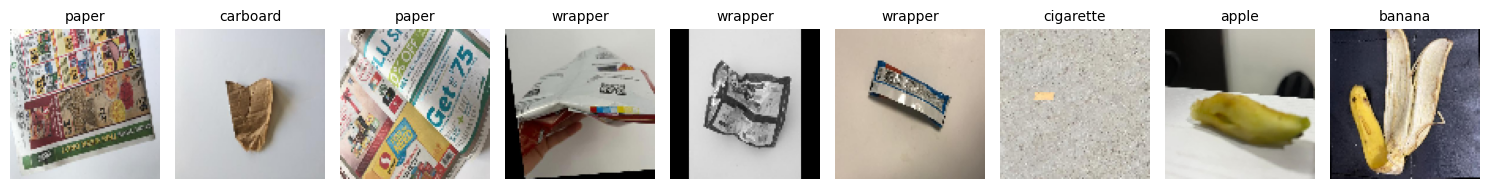

In [ ]:
# Número de imágenes a mostrar
num_images_to_show = 9

# Seleccionar una muestra aleatoria del DataFrame
sampled_data = data.sample(num_images_to_show)

# Crear un gráfico con una sola fila de imágenes
plt.figure(figsize=(15, 3))  # Aumenta el ancho para que quepan todas las imágenes en una fila

for i, (image_path, label) in enumerate(zip(sampled_data['Imagen'], sampled_data['Etiqueta'])):
    # Cargar la imagen
    img = load_img(image_path, target_size=(95, 95))  # Redimensionar para visualización

    # Crear un subgráfico en una sola fila
    plt.subplot(1, num_images_to_show, i + 1)  # 1 fila y num_images_to_show columnas
    plt.imshow(img)

    # Mostrar el nombre de la clase como título
    class_name = class_labels.get(label, 'Desconocido')  # Evita errores si falta alguna etiqueta
    plt.title(f"{class_name}", fontsize=10)
    plt.axis('off')  # Oculta los ejes

plt.tight_layout()
plt.show()

# **Procesamiento de imágenes**

In [ ]:
# Configura las dimensiones de las imágenes
img_height, img_width = 95, 95

# Carga las imágenes y etiquetas
images = []

for i, row in data.iterrows():
    # Carga la imagen y redimensiónala
    img = load_img(row['Imagen'], target_size=(img_height, img_width))
    img_array = img_to_array(img) / 255.0  # Normaliza los píxeles entre 0 y 1
    images.append(img_array)

# Convierte las listas a arrays
X = np.array(images)
Y = data['Etiqueta']

print(f"Tamaño de X: {X.shape}")
print(f"Tamaño de y: {Y.shape}")

Tamaño de X: (3634, 95, 95, 3)
Tamaño de y: (3634, 9)


In [ ]:
# Convertir imágenes (X) a un formato plano para almacenarlas en CSV
X_flattened = X.reshape(X.shape[0], -1)  # Convertir cada imagen en un vector 1D

# Crear un DataFrame para las imágenes
X_df = pd.DataFrame(X_flattened)

# Crear un DataFrame para las etiquetas
y_df = pd.DataFrame(Y)

# Guardar los DataFrames en archivos CSV
X_df.to_csv('X_images.csv', index=False)
y_df.to_csv('y_labels.csv', index=False)

print("Archivos CSV creados: X_images.csv y y_labels.csv")

Archivos CSV creados: X_images.csv y y_labels.csv


# **Cargar .csv**

In [2]:
#Leer CSV
y_df = pd.read_csv('/content/drive/MyDrive/ProyectoIA/DataBase/y_labels.csv') #Editar ruta según el computador
X_df = pd.read_csv('/content/drive/MyDrive/ProyectoIA/DataBase/X_images.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ProyectoIA/DataBase/y_labels.csv'

In [ ]:
print(X_df.shape)
print(y_df.shape)

(3634, 27075)
(3634, 1)


# **Muestra de imagenes**

In [ ]:
X_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,27065,27066,27067,27068,27069,27070,27071,27072,27073,27074
0,0.745098,0.678431,0.607843,0.788235,0.721569,0.650980,0.890196,0.823529,0.752941,0.588235,...,0.835294,0.992157,0.941176,0.866667,0.913725,0.862745,0.788235,0.949020,0.898039,0.823529
1,0.423529,0.423529,0.423529,0.745098,0.745098,0.745098,0.560784,0.560784,0.560784,0.450980,...,0.552941,0.403922,0.403922,0.396078,0.207843,0.207843,0.200000,0.435294,0.435294,0.427451
2,0.815686,0.815686,0.807843,0.827451,0.827451,0.819608,0.847059,0.847059,0.839216,0.917647,...,0.850980,0.862745,0.862745,0.862745,0.929412,0.929412,0.929412,0.913725,0.913725,0.913725
3,0.360784,0.372549,0.392157,0.439216,0.450980,0.470588,0.337255,0.349020,0.368627,0.384314,...,0.082353,0.156863,0.223529,0.098039,0.317647,0.384314,0.243137,0.184314,0.254902,0.105882
4,0.380392,0.525490,0.082353,0.854902,0.980392,0.482353,0.564706,0.694118,0.141176,0.423529,...,0.231373,0.023529,0.054902,0.000000,0.250980,0.298039,0.149020,0.843137,0.960784,0.474510


# **Muestra de etiquetas**

In [ ]:
y_df.head(5)

,Etiqueta
0,0
1,0
2,0
3,0
4,0


# **MODELOS DE CLASIFICACIÓN**

# **1. GaussianNB**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=21, shuffle = True)

est = GaussianNB()

#print(X.shape, y.shape)
est.fit(X_train,y_train)
predictions = est.predict(X_test)

print(classification_report(y_test, predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.38      0.39      0.39        84
           1       0.38      0.23      0.29        91
           2       0.29      0.45      0.35        73
           3       0.45      0.32      0.37        79
           4       0.30      0.56      0.39        78
           5       0.60      0.49      0.54        80
           6       0.40      0.67      0.50        79
           7       0.47      0.11      0.18        80
           8       0.44      0.27      0.33        83

    accuracy                           0.38       727
   macro avg       0.41      0.39      0.37       727
weighted avg       0.41      0.38      0.37       727



# **2. DecisionTree**

In [ ]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split( X_df, y_df, test_size=0.2, random_state=42, shuffle=True)

# Inicializar y entrenar el modelo de árbol de decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Realizar predicciones
predicciones = clf.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, predicciones))
print(classification_report(y_test, predicciones))

Accuracy: 0.4828060522696011
              precision    recall  f1-score   support

           0       0.48      0.41      0.44        96
           1       0.46      0.49      0.47        85
           2       0.41      0.38      0.39        79
           3       0.57      0.57      0.57        76
           4       0.37      0.40      0.39        84
           5       0.48      0.51      0.50        70
           6       0.59      0.62      0.60        76
           7       0.47      0.43      0.45        81
           8       0.54      0.56      0.55        80

    accuracy                           0.48       727
   macro avg       0.48      0.49      0.48       727
weighted avg       0.48      0.48      0.48       727



# **3. RandomForestClassifier**

In [ ]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_df, y_df, test_size=0.2, random_state=42, shuffle=True
)

# Inicializar y entrenar el modelo Random Forest
clf_rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
clf_rf.fit(X_train, y_train)

# Realizar predicciones
predicciones_rf = clf_rf.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, predicciones_rf))
print(classification_report(y_test, predicciones_rf))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.7166437414030261
              precision    recall  f1-score   support

           0       0.70      0.91      0.79        96
           1       0.80      0.61      0.69        85
           2       0.57      0.53      0.55        79
           3       0.71      0.80      0.75        76
           4       0.66      0.67      0.66        84
           5       0.74      0.69      0.71        70
           6       0.71      0.82      0.76        76
           7       0.77      0.73      0.75        81
           8       0.84      0.68      0.75        80

    accuracy                           0.72       727
   macro avg       0.72      0.71      0.71       727
weighted avg       0.72      0.72      0.71       727



# **4. SVC**

In [ ]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_df, y_df, test_size=0.2, random_state=42, shuffle=True
)

# Inicializar y entrenar el modelo SVC
clf_svc = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
clf_svc.fit(X_train, y_train)

# Realizar predicciones
predicciones_svc = clf_svc.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, predicciones_svc))
print(classification_report(y_test, predicciones_svc))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.6918844566712518
              precision    recall  f1-score   support

           0       0.75      0.95      0.84        96
           1       0.64      0.55      0.59        85
           2       0.48      0.56      0.52        79
           3       0.68      0.78      0.72        76
           4       0.52      0.52      0.52        84
           5       0.80      0.64      0.71        70
           6       0.74      0.92      0.82        76
           7       0.89      0.73      0.80        81
           8       0.81      0.55      0.66        80

    accuracy                           0.69       727
   macro avg       0.70      0.69      0.69       727
weighted avg       0.70      0.69      0.69       727



# **MODELOS DE REGRESIÓN**

# **1. Regresión Lineal**

In [ ]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=21, shuffle=True)

# Establecer el modelo de regresión
regressor = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
regressor.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = regressor.predict(X_test)

# Métricas
mse_svr = mean_squared_error(y_test, y_pred)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(y_test, y_pred)
r2_svr = r2_score(y_test, y_pred)

# Imprimir resultados
print("MSE SVM: {:.3f}".format(mse_svr))
print("RMSE SVM: {:.3f}".format(rmse_svr))
print("MAE SVM: {:.3f}".format(mae_svr))
print(f"R^2: {r2_svr:.3f}")

MSE SVM: 1098635887844489560064.000
RMSE SVM: 33145676759.488
MAE SVM: 20043452667.515
R^2: -160473168519650836480.000


# **2. Decision Tree Regressor**

In [ ]:
y_df = y_df.values.ravel()

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42, shuffle=True)

# Inicializar y entrenar el modelo de árbol de decisión
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Realizar predicciones
y_pred = regressor.predict(X_test)


mse_svr = mean_squared_error(y_test, y_pred)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(y_test, y_pred)
r2_svr = r2_score(y_test, y_pred)

# Imprimir resultados
print("MSE SVM: {:.3f}".format(mse_svr))
print("RMSE SVM: {:.3f}".format(rmse_svr))
print("MAE SVM: {:.3f}".format(mae_svr))
print(f"R^2: {r2_svr:.3f}")

MSE SVM: 7.920
RMSE SVM: 2.814
MAE SVM: 1.780
R^2: -0.137


# **3. Random Forest Regressor**

In [ ]:
# y_df = y_df.values.ravel()

# # Dividir los datos en entrenamiento y prueba
# X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.2,  random_state = 42)

# #Se entrena al modelo.
# regressor = RandomForestRegressor(max_depth=2)
# regressor.fit(X_train, y_train)

# mse_rf = mean_squared_error(y_test, regressor.predict(X_test))
# print("MSE depth split data  %.3f"% mean_squared_error(y_test, regressor.predict(X_test)))
# print("RMSE depth split data  %.3f"% np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))))
# print("MAE depth split data  %.3f"% mean_absolute_error(y_test, regressor.predict(X_test)))
# print(f'R^2: {r2_score(y_test, regressor.predict(X_test))}')

# **4. Suport Vector Regressor**

In [ ]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)


# Asegurarse de que y es 1D
y_train = y_train.ravel()
y_test = y_test.ravel()

# Entrenar el modelo con SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)

# Predicciones
y_pred = regressor.predict(X_test)

# Métricas
mse_svr = mean_squared_error(y_test, y_pred)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(y_test, y_pred)
r2_svr = r2_score(y_test, y_pred)

# Imprimir resultados
print("MSE SVM: {:.3f}".format(mse_svr))
print("RMSE SVM: {:.3f}".format(rmse_svr))
print("MAE SVM: {:.3f}".format(mae_svr))
print(f"R^2: {r2_svr:.3f}")

MSE SVM: 4.098
RMSE SVM: 2.024
MAE SVM: 1.500
R^2: 0.412


# **Bibliografía DataBase**


1. https://github.com/garythung/trashnet

2. https://github.com/pedropro/TACO

3. https://www.immersivelimit.com/datasets/cigarette-butts

4. (Autores del proyecto)